<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>


## **Applied Machine Learning - Ensemble Modeling Live Training**

Welcome to this hands-on training where you will immerse yourself in applied machine learning in Python where we'll explore model stacking. Using `sklearn.ensemble`, we'll learn how to create layers that are stacking-ready.

The foundations of model stacking:

* Create various types of baseline models, including linear and logistic regression using Scikit-Learn, for comparison to ensemble methods.
* Build layers, then stack them up.
* Calculate and visualize performance metrics.



---



## **1st Dataset**


The first dataset we'll use is a CSV file named `pima-indians-diabetes.csv`, which contains data on females of Pima Indian heritage that are at least 21 years old. It contains the following columns:

- `n_preg`: Number of pregnancies
- `pl_glucose`: Plasma glucose concentration 2 hours after an oral glucose tolerance test
- `dia_bp`: Diastolic blood pressure (mm Hg)
- `tri_thick`: Triceps skin fold thickness (mm)
- `serum_ins`: 2-Hour serum insulin (mu U/ml)
- `bmi`: Body mass index (weight in kg/(height in m)^2)
- `diab_ped`: Diabetes pedigree function
- `age`: Age (years)
- `class`: Class variable (0 or 1)


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Read in the dataset as Pandas DataFrame
diabetes = pd.read_csv('https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/data/pima-indians-diabetes.csv?raw=true')

In [3]:
# Look at data using the info() function
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_preg      768 non-null    int64  
 1   pl_glucose  768 non-null    int64  
 2   dia_bp      768 non-null    int64  
 3   tri_thick   768 non-null    int64  
 4   serum_ins   768 non-null    int64  
 5   bmi         768 non-null    float64
 6   diab_ped    768 non-null    float64
 7   age         768 non-null    int64  
 8   class       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Observations:** 
- The `info()` function is critical to beginning to understand your data.  Here, there are no missing values.  However, that is not typical.
- There is a mixture of integers and floats with the first 5 columns being `int64`, the next 2 `float64` and the last 2 'int64`.

---

## Q&A

--- 

In [ ]:
# Look at data using the describe() function
diabetes.describe()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



## **Observations:** 
- The `.describe()` function gives the summary statistics of the data.  Notice that the min of the 1st six columns is zero.  Even though there are no missing values, this is indicative of the measurements for those features having not been captured.
- Although we previously saw there is a mixture of integer and float data types (as seen with `.info()`), the printout makes it appear as if all values are float.  

In [ ]:
# Print the first 5 rows of the data using the head() function
diabetes.head()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



## **Observation:**
- Printing out the first 5 rows, we see that the data types of the columns are indeed as stated previously.

## Let's check the number in each class:

This avoids getting surprised by great results that are actually a side effect of class imbalance.  This happens when the majority class far outweighs the minority class.

In [ ]:
# Summarize class distribution
target = diabetes['class']
counter = Counter(target)
print(counter)

Counter({0: 500, 1: 268})


## **Observation:** For every two negative cases there is one positive case, not enough of a difference to be considered class imbalance.  
- Class imbalance tends to exist when the majority class is > 90% although there is no hard and fast rule about this threshold.

In [3]:
# Convert Pandas DataFrame to numpy array - Return only the values of the DataFrame with DataFrame.to_numpy()
diabetes = diabetes.to_numpy()

### Always verify that your X matrix and target array have the same number of rows to avoid errors during model training.

In [4]:
# Create X matrix and y (target) array using slicing [row_start:row_end, col_start:target_col],[row_start:row_end, target_col]
X, y = diabetes[:, :-1], diabetes[:, -1]

# Print X matrix and y (target) array dimensions using .shape 
print('Shape of X and y: %s, %s' % (X.shape, y.shape))

Shape of X and y: (768, 8), (768,)


In [5]:
# Convert X matrix data types to 'float32' for consistency using .astype()
X = X.astype('float32')

# Convert y (target) array to 'str' using .astype()
y = y.astype('str')

# Encode class labels in y array using dot notation with LabelEncoder().fit_transform()
# Hint: y goes in the fit_transform function call
y = LabelEncoder().fit_transform(y)

### Don't let the `.astype('str')` throw you!  This is simply taking the class labels and label encoding them – regardless of their original format.




## **Creating a Naive Classifier**
Here we'll use the `DummyClassifier` from `sklearn`.  This creates a so-called 'naive' classifer and is simply a model that predicts a single class for all of the rows, regardless of their original class.  

1. `DummyClassifier()` arguments:
 - `strategy`: Strategy to use to generate predictions.

2. `RepeatedStratifiedKFold()` arguments:
 - `n_splits`: Number of folds.
 - `n_repeats`: Number of times cross-validator needs to be repeated.
 - `random_state`: Controls the generation of the random states for each repetition. Pass an int for reproducible output across multiple function calls.  (This is an equivalent argument to np.random.seed above, but will be specific to this naive model.)

3. `cross_val_score()` arguments:
 - The model to use.
 - The data to fit. (X)
 - The target variable to try to predict. (y)
 - `scoring`: A single string scorer callable object/function such as 'accuracy' or 'roc_auc'.  See https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for more options.
 - `cv`: Cross-validation splitting strategy (default is 5)
 - `n_jobs`: Number of CPU cores used when parallelizing.  Set to -1 helps to avoid non-convergence errors.
 - `error_score`: Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised.

In [6]:
# Evaluate naive

# Instantiate a DummyClassifier with 'most_frequent' strategy
naive = DummyClassifier(strategy='most_frequent')

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(naive, X, y, scoring='accuracy', cv = cv, n_jobs=1, error_score='raise')

# Print mean and standard deviation of n_scores: 
print('Naive score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Naive score: 0.651 (0.003)


## **Observation** 
- We want to do better than 65% accuracy to consider any other models as an improvement to a totally naive model.

## **Creating a Baseline Classifier**
Now we'll create a baseline classifier, one that seeks to correctly predict the class that each observation belongs to.  Since the target variable is binary, we'll instantiate a `DecisionTreeClassifier` model. 

In [7]:
# Evaluate baseline model

# Instantiate a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator 'cv', and error_score set to 'raise'
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, error_score='raise')

# Print mean and standard deviation of m_scores: 
print('Baseline score: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Baseline score: 0.701 (0.058)


## **Observation**
- We want to do better than 70% with a Stacking Classifier to consider it an improvement over this baseline Decision Tree model.

## **Getting started with Stacking Classifier**

- We're going to compare several additional baseline classifiers to see if they perform better than the Decision Tree Classifier we just trained previously.


<p align="center">
<img src="https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/assets/stacking.png?raw=True" alt = "Stacking" width="90%">
</p>
<br><br>

- We'll start by importing additional packages that we'll need.

In [8]:
# Import several other classifiers for ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

## Create custom functions
1. get_stacking() - This function will create the layers of our `StackingClassifier()`.
2. get_models() - This function will create a dictionary of models to be evaluated.
3. evaluate_model() - This function will evaluate each of the models to be compared.

## Custom function # 1: get_stacking()
1. `StackingClassifier()` arguments:
 - `estimators`: List of baseline classifiers
 - `final_estimator`: Defined meta classifier 
 - `cv`: Number of cross validations to perform.

In [9]:
# Define get_stacking():
def get_stacking():

	# Create an empty list for the base models called layer1
  layer1 = list()

  # Append tuple with classifier name and instantiations (no arguments) for DecisionTreeClassifier, KNeighborsClassifier, SVC, and GaussianNB base models
  # Hint: layer1.append(('ModelName', Classifier()))
  layer1.append(('DT', DecisionTreeClassifier()))
  layer1.append(('KNN', KNeighborsClassifier()))
  layer1.append(('SVM', SVC()))
  layer1.append(('Bayes', GaussianNB()))

  # Instantiate Logistic Regression as meta learner model called layer2
  layer2 = LogisticRegression()

	# Define StackingClassifier() called model passing layer1 model list and meta learner with 5 cross-validations
  model = StackingClassifier(estimators=layer1, final_estimator=layer2, cv = 5)

  # return model
  return model

## Custom function # 2: get_models()

In [10]:
# Define get_models():
def get_models():

  # Create empty dictionary called models
  models = dict()

  # Add key:value pairs to dictionary with key as ModelName and value as instantiations (no arguments) for DecisionTreeClassifier, KNeighborsClassifier, SVC, and GaussianNB base models
  # Hint: models['ModelName'] = Classifier()
  models['DT'] = DecisionTreeClassifier()
  models['KNN'] = KNeighborsClassifier()
  models['SVM'] = SVC()
  models['Bayes'] = GaussianNB()

  # Add key:value pair to dictionary with key called Stacking and value that calls get_stacking() custom function
  models['Stacking'] = get_stacking()

  # return dictionary
  return models

## Custom function # 3: evaluate_model(model)

In [11]:
# Define evaluate_model:
def evaluate_model(model):

  # Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 42.
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

  # Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator 'cv', n_jobs=-1, and error_score set to 'raise'
  scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1, error_score='raise')

  # return scores
  return scores

In [12]:
# Assign get_models() to a variable called models
models = get_models()

## Python Dictionary Review:
- The items() method is used to return the list with all dictionary keys with values. Parameters: This method takes no parameters. Returns: A view object that displays a list of a given dictionary's (key, value) tuple pair.
- For our purposes, we'll use the dictionary created when we call the get_models() custom function in a for loop to iterate over each key:value pair and store the results.
- Then, we will plot the results as a `boxplot` for comparison using `seaborn`.

1. `sns.boxplot()` arguments:
 - `x`: Names of the variables in the data
 - `y`: Names of the variables in the data
 - `showmeans`: Whether or not to show mark at the mean of the data.

>DT 0.707 (0.048)
>KNN 0.713 (0.058)
>SVM 0.759 (0.045)
>Bayes 0.760 (0.049)
>Stacking 0.761 (0.047)


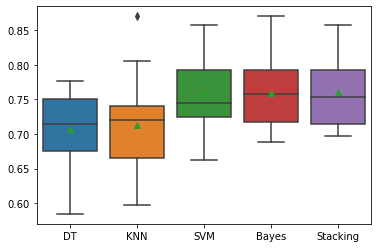

In [14]:
# Evaluate the models and store results
# Create an empty list for the results
results = list()

# Create an empty list for the model names
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():

	# Call evaluate_model(model) and assign it to variable called scores
	scores = evaluate_model(model)
 
  # Append output from scores to the results list
	results.append(scores)
 
  # Append name to the names list
	names.append(name)
 
  # Print name, mean and standard deviation of scores:
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison using names for x and results for y and setting showmeans to True
sns.boxplot(x=names, y=results, showmeans = True)

## **Observation**
- Recall that we want to do better than 70% with a Stacking Classifier to consider it an improvement over the Decision Tree baseline model and, although we did achieve that, we can probably do even better with this dataset.  
- Let's try some hyperparameter tuning via cross-validation next...

---

## Q&A

--- 


In [21]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Import additional libraries
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from datetime import datetime

## Custom function # 4: best_model(name, model)
- We're going to create a Pipeline that scales the data before applying the parameter grid via cross-validation.
- Then it returns the model with the best hyperparameters from the search grid for each model.

In [15]:
# Define best_model:
def best_model(name, model):
  pipe = Pipeline([('scaler', StandardScaler()), ('classifier',model)])  

  if name == 'SVM':
    param_grid = {'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']} 
    # Create grid search object
    # this uses k-fold cv
    clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs=-1)

    # Fit on data
    best_clf = clf.fit(X, y)

    best_hyperparams = best_clf.best_estimator_.get_params()['classifier']

    return name, best_hyperparams 

  if name == 'Bayes': 
    param_grid = {'classifier__var_smoothing' : np.array([1e-09, 1e-08])} 
    # Create grid search object
    # this uses k-fold cv

    clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs=-1)

    # Fit on data
    best_clf = clf.fit(X, y)

    best_hyperparams = best_clf.best_estimator_.get_params()['classifier']

    return name, best_hyperparams 

  if name == 'RF': 
    param_grid = {'classifier__criterion' : np.array(['gini', 'entropy']),
                  'classifier__max_depth' : np.arange(5,11)} 
    # Create grid search object
    # this uses k-fold cv

    clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs=-1)

    # Fit on data
    best_clf = clf.fit(X, y)

    best_hyperparams = best_clf.best_estimator_.get_params()['classifier']
 
    return name, best_hyperparams  

  if name == 'XGB':
    param_grid = {'classifier__learning_rate' : np.arange(0.022,0.04,.01),
                  'classifier__max_depth' : np.arange(5,10)} 
    # Create grid search object
    # this uses k-fold cv
    clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5,  n_jobs=-1)

    # Fit on data
    best_clf = clf.fit(X, y)
    best_hyperparams = best_clf.best_estimator_.get_params()['classifier']

    return name, best_hyperparams  

## Adding Random Forest and XGBoost to our get_stacking() custom function in layer 1 (and removing the poorest performers DT and KNN):

In [17]:
# Define get_stacking():  
def get_stacking():

	# Create an empty list for the base models called layer1
  layer1 = list()

  # Append tuple with classifier name and instantiations (no arguments) for SVC and GaussianNB base models AND call cust fx #4 best_model on each
  # Hint: layer1.append((best_model('ModelName', Classifier())))
  layer1.append((best_model('SVM', SVC())))
  layer1.append((best_model('Bayes', GaussianNB())))
  

  # Add RandomForestClassifier and xgb.XGBClassifier as base models
  layer1.append((best_model('RF', RandomForestClassifier())))
  layer1.append((best_model('XGB', xgb.XGBClassifier())))

  # Instantiate Logistic Regression as meta learner model called layer2
  layer2 = LogisticRegression()

	# Define StackingClassifier() called model passing layer1 model list and meta learner with 5 cross-validations
  model = StackingClassifier(estimators=layer1, final_estimator=layer2, cv=5)

  # return model
  return model

## Adding Random Forest and XGBoost to our get_models() custom function:

In [18]:
# Define get_models():
def get_models():

  # Create empty dictionary called models
  models = dict()

  # Add key:value pairs to dictionary with key as ModelName and value as instantiations (no arguments) for SVC and GaussianNB base models
  # Hint: models['ModelName'] = Classifier() 
  models['SVM'] = SVC()
  models['Bayes'] = GaussianNB()

  # we'll add two more classifers to the mix - RandomForestClassifier and xgb.XGBClassifier
  models['RF'] = RandomForestClassifier()
  models['XGB'] = xgb.XGBClassifier()


  # Add key:value pair to dictionary with key called Stacking and value that calls get_stacking() custom function
  models['Stacking'] = get_stacking()

  # return dictionary
  return models

In [23]:
# Assign get_models() to a variable called models
models = get_models()

## Custom function # 3: evaluate_model(model)

In [24]:
# Define evaluate_model(model):
def evaluate_model(model):

  # Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  # Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator 'cv', n_jobs=-1, and error_score set to 'raise'
  scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs = -1, error_score = 'raise')

  # return scores
  return scores

# 10 minute break while the following runs...

>SVM 0.757 (0.040)
>Bayes 0.759 (0.055)
>RF 0.760 (0.043)
>XGB 0.742 (0.050)
>Stacking 0.767 (0.044)


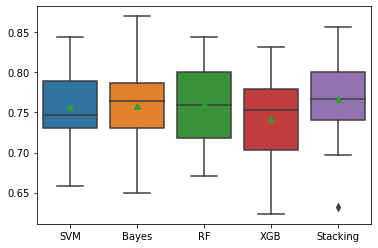

In [25]:
# Evaluate the models and store results
# Create an empty list for the results
results = list()

# Create an empty list for the model names
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():

	# Call evaluate_model(model) and assign it to variable called scores
	scores = evaluate_model(model)
 
  # Append output from scores to the results list
	results.append(scores)
 
  # Append name to the names list
	names.append(name)
 
  # Print name, mean and standard deviation of scores:
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison using names for x and results for y and setting showmeans to True
sns.boxplot(x=names, y=results, showmeans = True)

## **Observation**
- Before we added XGBoost and hyperparameter tuning, our Stacking Classifier got ~ 76% accuracy. 
- Here, we got just around 77% accuracy, a minor improvement, but an improvement nonetheless.
- We could continue fiddling with other algorithms in layer 1
- We could try other algorithms in layer 2.
- We could add more hyperparameters to our parameter grid.
- To this last point, keep in mind that the more parameters there are in a grid to search over, the longer it takes to train the Stacking Classifier.

---

## Q&A

--- 

# **Stacking Regressor**

In [26]:
# Import libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

## **2nd Dataset**


The second dataset we'll use is a CSV file named `abalone.csv`, which contains data on physical measurements of abalone shells used to determine the age of the abalone.  It contains the following columns:

- `Sex`: M, F, and I (infant) - (removed for our purposes)
- `Length`: Longest shell measurement (mm)
- `Diameter`: Perpendicular to length (mm)
- `Height`: with meat in shell (mm)
- `Whole weight`: whole abalone (grams)
- `Shucked weight`: weight of meat (grams)
- `Viscera weight`: gut weight (grams)
- `Shell weight`: after being dried (grams)
- `Rings`: +1.5 gives the age in years

	

### **Get the dataset**

In [27]:
# Read in the dataset as Pandas DataFrame
abalone = pd.read_csv('https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/data/abalone.csv?raw=true')

In [28]:
# Look at data using the info() function
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7    Shell weight   4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## **Observations:** 
- Here, there are no missing values.  Again, that is not typical.
- There is a mixture of object, float, and integers with the first column being `object` (categorical), the next 7 `float64` and the last 'int64`.

In [29]:
# Look at data using the describe() function
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## **Observations:** 
- Notice that the min of the `Height` column is zero.  Even though there are no missing values, this is indicative of the measurements for that feature having not been captured.
- Again, the printout makes it appear as if all numeric values are float.  



In [30]:
# Print the first 5 rows of the data using the head() function
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## **Observation:**
- Printing out the first 5 rows, we see that the 1st column is the only non-numeric feature in this dataset and is aligned with the `object` datatype as we saw above when we called `.info()`.

In [31]:
# Convert Pandas DataFrame to numpy array - Return only the values of the DataFrame with DataFrame.to_numpy()
abalone = abalone.to_numpy()

# Create X matrix and y (target) array using slicing [row_start:row_end, 1:target_col],[row_start:row_end, target_col] - Removing 1st column by starting at index 1
X, y = abalone[:, 1:-1], abalone[:, -1]

# Print X matrix and y (target) array dimensions using .shape
print('Shape: %s, %s' % (X.shape,y.shape))

Shape: (4177, 7), (4177,)


In [32]:
# Convert y (target) array to 'float32' using .astype()
y = y.astype('float32')

## **Creating a Naive Regressor**
Here we'll use the `DummyRegressor` from `sklearn`.  This creates a so-called 'naive' regressor and is simply a model that predicts a single value for all of the rows, regardless of their original value.  

1. `DummyRegressor()` arguments:
 - `strategy`: Strategy to use to generate predictions.

2. `RepeatedKFold()` arguments:
 - `n_splits`: Number of folds.
 - `n_repeats`: Number of times cross-validator needs to be repeated.
 - `random_state`: Controls the generation of the random states for each repetition. Pass an int for reproducible output across multiple function calls.  (This is an equivalent argument to np.random.seed above, but will be specific to this naive model.)

3. `cross_val_score()` arguments:
 - The model to use.
 - The data to fit. (X)
 - The target variable to try to predict. (y)
 - `scoring`: A single string scorer callable object/function such as 'accuracy' or 'roc_auc'.  See https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for more options.
 - `cv`: Cross-validation splitting strategy (default is 5)
 - `n_jobs`: Number of CPU cores used when parallelizing.  Set to -1 helps to avoid non-convergence errors.
 - `error_score`: Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised.

In [33]:
# Evaluate naive

# Instantiate a DummyRegressor with 'median' strategy
naive = DummyRegressor(strategy='median')

# Create RepeatedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'neg_mean_absolute_error' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(naive, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# Print mean and standard deviation of n_scores:
print('Baseline: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Baseline: -2.372 (0.119)


## **Observation** 
- We want to do better than -2.37 to consider any other models as an improvement to a totally naive regressor model with the Abalone dataset.

## **Creating a Baseline Regressor**
Now we'll create a baseline regressor, one that seeks to correctly predict the value for each observation.  Since the target variable is continuous, we'll instantiate a Support Vector Regression model.

1. `SVR()` arguments:
 - `kernel`: Specifies the kernel type to be used in the algorithm.
 - `gamma`:  Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. 
 - `C`: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [34]:
# Evaluate baseline model

# Instantiate a Support Vector Regressor with 'rbf' kernel, gamma set to 'scale', and regularization parameter set to 10
model = SVR(kernel='rbf',gamma='scale',C=10)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'neg_mean_absolute_error' scoring, cross validator 'cv', n_jobs=-1, and error_score set to 'raise'
m_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# Print mean and standard deviation of m_scores: 
print('Good: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Good: -1.483 (0.075)


## **Observation**
- We want to do better than -1.48 with a Stacking Regressor to consider it an improvement over this baseline support vector regression model with the Abalone dataset.

## **Getting started with Stacking Regressor**
- We're going to compare several additional baseline regressors to see if they perform better than SVR we just trained previously.
- We'll start by importing additional packages that we'll need.

In [35]:
# Compare machine learning models for regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

## Create custom functions
1. get_stacking() - This function will create the layers of our `StackingRegressor()`.
2. get_models() - This function will create a dictionary of models to be evaluated.
3. evaluate_model() - This function will evaluate each of the models to be compared.

## Custom function # 1: get_stacking()
1. `StackingRegressor()` arguments:
 - `estimators`: List of baseline regressors
 - `final_estimator`: Defined meta regressor 
 - `cv`: Number of cross validations to perform.

In [36]:
# Define get_stacking():
def get_stacking():

	# Create an empty list for the base models called layer1
  layer1 = list()

  # Append tuple with classifier name and instantiations (no arguments) for KNeighborsRegressor, DecisionTreeRegressor, and SVR base models
  # Hint: layer1.append(('ModelName', Classifier()))
  layer1.append(('KNN', KNeighborsRegressor()))
  layer1.append(('DT', DecisionTreeRegressor()))
  layer1.append(('SVM', SVR()))

  # Instantiate Linear Regression as meta learner model called layer2
  layer2 = LinearRegression()

	# Define Stackingregressor() called model passing layer1 model list and meta learner with 5 cross-validations
  model = StackingRegressor(estimators=layer1, final_estimator=layer2, cv=5)

  # return model
  return model

## Custom function # 2: get_models()

In [37]:
# Define get_models():
def get_models():

  # Create empty dictionary called models
  models = dict()

  # Add key:value pairs to dictionary with key as ModelName and value as instantiations (no arguments) for KNeighborsRegressor, DecisionTreeRegressor, and SVR base models
  # Hint: models['ModelName'] = Classifier()
  models['KNN'] = KNeighborsRegressor()
  models['DT'] = DecisionTreeRegressor()
  models['SVM'] = SVR()

  # Add key:value pair to dictionary with key called Stacking and value that calls get_stacking() custom function
  models['Stacking'] = get_stacking()

  # return dictionary
  return models

## Custom function # 3: evaluate_model(model)

In [38]:
# Define evaluate_model:
def evaluate_model(model):

  # Create RepeatedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 
  # Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'neg_mean_absolute_error' scoring, cross validator 'cv', n_jobs=-1, and error_score set to 'raise'
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 
  # return scores
	return scores

In [39]:
# Assign get_models() to a variable called models
models = get_models()

>KNN -1.597 (0.064)
>DT -2.099 (0.120)
>SVM -1.518 (0.077)
>Stacking -1.537 (0.068)


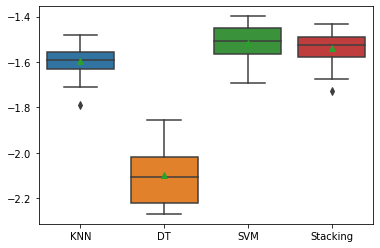

In [40]:
# Evaluate the models and store results
# Create an empty list for the results
results = list()

# Create an empty list for the model names
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():

	# Call evaluate_model(model) and assign it to variable called scores
	scores = evaluate_model(model)
 
  # Append output from scores to the results list
	results.append(scores)
 
  # Append name to the names list
	names.append(name)
 
  # Print name, mean and standard deviation of scores:
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Plot model performance for comparison using names for x and results for y and setting showmeans to True
sns.boxplot(x=names, y=results, showmeans=True)

## **Observation**
- Recall that we want to do better than -1.48  with a Stacking Regressor to consider it an improvement over this baseline SVR and, although close, we did not achieve that with this dataset.
- So what else can try to improve our results with stacking?

### We'll add another layer to the mix...

## **Double Stacking - 2 Layers**
- Can get a little tricky
- Just make sure that you name your layers VERY CLEARLY!
- Both the last layer (here it's layer 3) and the stacking model will use a call to `StackingRegressor()`
- The last layer will combine the 2nd layer with the final estimator while the model will combine the 1st layer with this last layer.

<p align="center">
<img src="https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/assets/DoubleStacking.png?raw=True" alt = "Double Stacking" width="90%">
</p>
<br><br>

In [41]:
# Define get_stacking() - adding another layer:
def get_stacking():

	# Create an empty list for the 1st layer of base models called layer1
  layer1 = list()

  # Create an empty list for the 2nd layer of base models called layer2
  layer2 = list()

  # Append tuple with classifier name and instantiations (no arguments) for KNeighborsRegressor, DecisionTreeRegressor, and SVR base models
  # Hint: layer1.append(('ModelName', Classifier()))
  layer1.append(('KNN', KNeighborsRegressor()))
  layer1.append(('DT', DecisionTreeRegressor()))
  layer1.append(('SVM', SVR()))

  # Append tuple with classifier name and instantiations (no arguments) for KNeighborsRegressor, DecisionTreeRegressor, and SVR base models
  # Hint: layer2.append(('ModelName', Classifier()))
  layer2.append(('KNN', KNeighborsRegressor()))
  layer2.append(('DT', DecisionTreeRegressor()))
  layer2.append(('SVM', SVR()))

	# Define meta learner StackingRegressor() called layer3 passing layer2 model list to estimators, LinearRegression() to final_estimator with 5 cross-validations
  layer3 = StackingRegressor(estimators=layer2, final_estimator=LinearRegression(), cv=5)

	# Define Stackingregressor()  called model passing layer1 model list to estimators and meta learner (layer3) to final_estimator with 5 cross-validations
  model = StackingRegressor(estimators=layer1, final_estimator=layer3, cv=5)

  # return model
  return model

In [42]:
# Assign get_models() to a variable called models
models = get_models()

>KNN -1.597 (0.064)
>DT -2.101 (0.119)
>SVM -1.518 (0.077)
>Stacking -1.548 (0.071)


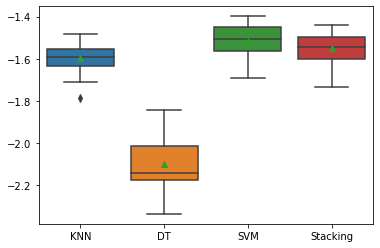

In [43]:
# Evaluate the models and store results
# Create an empty list for the results
results = list()

# Create an empty list for the model names
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():

	# Call evaluate_model(model) and assign it to variable called scores
	scores = evaluate_model(model)
 
  # Append output from scores to the results list
	results.append(scores)
 
  # Append name to the names list
	names.append(name)
 
  # Print name, mean and standard deviation of scores:
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# Plot model performance for comparison using names for x and results for y and setting showmeans to True
sns.boxplot(x=names, y=results, showmeans=True)

## **Final Observation**
- Adding a layer did not improve results.
- Complexity does not always make a better model
- Could try different base models to stack for both of the datasets and that may show improvements over baseline.
- Generate polynomial features 
- Try sklearn feature selection
- Try feature engineering - creating new features from existing ones (but remember to remove the original features to avoid multicollinearity)
- Tune hyperparameters for grid search as previously with Stacking Classifier
- When there is a tie between a baseline model and a stacked model, choose the simpler model!

---

# Q&A

---

# Back to the slides for wrap-up...